# TripAdvisor Score Detection


## Importing Libraries

In [1]:
import pandas
import numpy
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Loading Data

In [2]:
data = pandas.read_excel(r"C:\Users\arpit\Desktop\data.xlsx")
data.head()

,User_country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


# Data Preprocessing

In [3]:
data.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


In [4]:
data.dtypes

User_country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Swimming Pool        object
Exercise Room        object
Basketball Court     object
Yoga Classes         object
Club                 object
Free Wifi            object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

In [5]:
user_country = data['User_country']
count = user_country.value_counts()
print(count)

USA                     217
UK                       72
Canada                   65
Australia                36
Ireland                  13
India                    11
Mexico                    8
Germany                   7
New Zeland                5
Brazil                    5
Egypt                     5
Netherlands               4
Singapore                 4
Norway                    3
Thailand                  3
Malaysia                  3
Hawaii                    3
Israel                    3
Finland                   3
Switzerland               2
Spain                     2
United Arab Emirates      2
Scotland                  2
Costa Rica                2
Greece                    1
Belgium                   1
Japan                     1
Korea                     1
India                     1
Honduras                  1
Denmark                   1
Kuwait                    1
China                     1
Puerto Rico               1
Saudi Arabia              1
Taiwan              

In [6]:
# Creating one more column 'countries_new' which label all the countries with count less than 7 as 'Others'
# re-grouping of the User Country variable

In [7]:
conditions = [data.User_country == 'USA',data.User_country == 'UK',
             data.User_country == 'Canada',data.User_country == 'Australia',
             data.User_country == 'Ireland',data.User_country == 'India',
             data.User_country == 'Mexico',data.User_country == 'Germany']
choices = ['USA', 'UK', 'Canada','Australia','Ireland','India','Mexico','Germany']
data['countries_new'] = numpy.select(conditions, choices, default='Others')

In [8]:
pandas.isnull(data).sum()

User_country         0
Nr. reviews          0
Nr. hotel reviews    0
Helpful votes        0
Score                0
Period of stay       0
Traveler type        0
Swimming Pool        0
Exercise Room        0
Basketball Court     0
Yoga Classes         0
Club                 0
Free Wifi            0
Hotel name           0
Hotel stars          0
Nr. rooms            0
User continent       0
Member years         0
Review month         0
Review weekday       0
countries_new        0
dtype: int64

In [9]:
# One hot encoding of Categorical Features

In [10]:
data_cat_feats = data[['Period of stay','Traveler type','Swimming Pool',
                      'Exercise Room','Basketball Court','Yoga Classes',
                      'Club','Free Wifi','Hotel name','Hotel stars',
                      'User continent','Review month','Review weekday',
                      'countries_new']]
data_one_hot = pandas.get_dummies(data_cat_feats, drop_first=True)

In [34]:
# Numerical Features
data_con_feats = data[['Nr. reviews','Nr. hotel reviews','Helpful votes','Score','Nr. rooms','Member years']]

#Add all the features
data_cat_con_feats = pandas.concat([data_con_feats,data_one_hot], axis = 1)
data_cat_con_feats.columns
data_cat_con_feats.head(20)

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years,Period of stay_Jun-Aug,Period of stay_Mar-May,Period of stay_Sep-Nov,Traveler type_Couples,...,Review weekday_Tuesday,Review weekday_Wednesday,countries_new_Canada,countries_new_Germany,countries_new_India,countries_new_Ireland,countries_new_Mexico,countries_new_Others,countries_new_UK,countries_new_USA
0,11,4,13,5,3773,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,119,21,75,3,3773,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,36,9,25,5,3773,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,14,7,14,4,3773,6,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,5,2,4,3773,7,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
5,31,8,27,3,3773,2,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
6,45,12,46,4,3773,4,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
7,2,1,4,4,3773,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8,24,3,8,4,3773,3,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,12,7,11,3,3773,5,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


In [12]:
data_cat_con_feats.dtypes

Nr. reviews                                           int64
Nr. hotel reviews                                     int64
Helpful votes                                         int64
Score                                                 int64
Nr. rooms                                             int64
Member years                                          int64
Period of stay_Jun-Aug                                uint8
Period of stay_Mar-May                                uint8
Period of stay_Sep-Nov                                uint8
Traveler type_Couples                                 uint8
Traveler type_Families                                uint8
Traveler type_Friends                                 uint8
Traveler type_Solo                                    uint8
Swimming Pool_YES                                     uint8
Exercise Room_YES                                     uint8
Basketball Court_YES                                  uint8
Yoga Classes_YES                        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029470004A20>]],
      dtype=object)

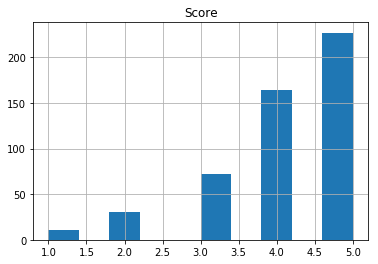

In [13]:
## distribution of Score label
data.hist(column = 'Score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002947132BCF8>]],
      dtype=object)

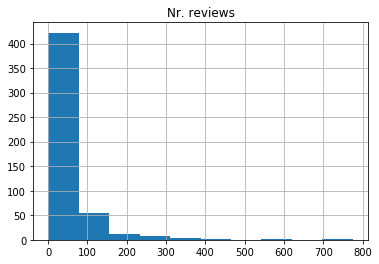

In [14]:
## distribution of Nr. reviews label
data.hist(column = 'Nr. reviews')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029471366588>]],
      dtype=object)

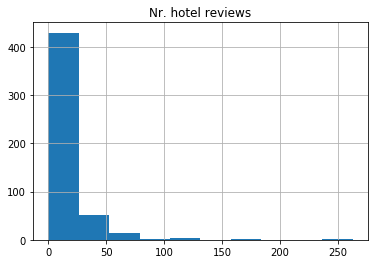

In [15]:
## distribution of Nr. hotel reviews  label
data.hist(column = 'Nr. hotel reviews')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002946FEB9EB8>]],
      dtype=object)

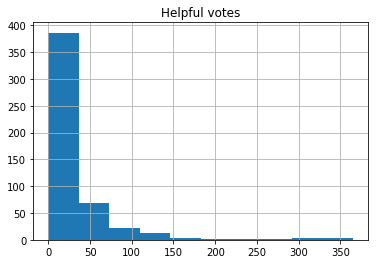

In [16]:
## distribution of Helpful votes  label
data.hist(column = 'Helpful votes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294714AA1D0>]],
      dtype=object)

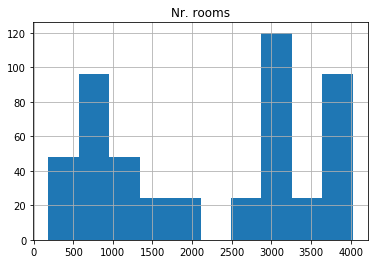

In [17]:
## distribution of Nr. rooms  label
data.hist(column = 'Nr. rooms')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294714F9C88>]],
      dtype=object)

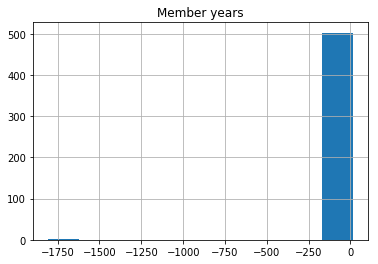

In [18]:
## distribution of Nr. rooms  label
data.hist(column = 'Member years')

In [19]:
## Treating Unusual values
# Removal of unusual data values (One value in Member Years column is negative)

data_cat_con_feats['Member years'][data_cat_con_feats['Member years']<0]=0

C:\Users\arpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
feature_list = ['Nr. reviews',
 'Nr. hotel reviews',
 'Helpful votes',
 'Nr. rooms',
 'Member years',
 'Period of stay_Jun-Aug',
 'Period of stay_Mar-May',
 'Period of stay_Sep-Nov',
 'Traveler type_Couples',
 'Traveler type_Families',
 'Traveler type_Friends',
 'Traveler type_Solo',
 'Swimming Pool_YES',
 'Exercise Room_YES',
 'Basketball Court_YES',
 'Yoga Classes_YES',
 'Club_YES',
 'Free Wifi_YES',
 'Hotel name_Caesars Palace',
 'Hotel name_Circus Circus Hotel & Casino Las Vegas',
 'Hotel name_Encore at wynn Las Vegas',
 'Hotel name_Excalibur Hotel & Casino',
 'Hotel name_Hilton Grand Vacations at the Flamingo',
 'Hotel name_Hilton Grand Vacations on the Boulevard',
 "Hotel name_Marriott's Grand Chateau",
 'Hotel name_Monte Carlo Resort&Casino',
 'Hotel name_Paris Las Vegas',
 'Hotel name_The Cosmopolitan Las Vegas',
 'Hotel name_The Cromwell',
 'Hotel name_The Palazzo Resort Hotel Casino',
 'Hotel name_The Venetian Las Vegas Hotel',
 'Hotel name_The Westin las Vegas Hotel Casino & Spa',
 'Hotel name_Treasure Island- TI Hotel & Casino',
 'Hotel name_Tropicana Las Vegas - A Double Tree by Hilton Hotel',
 'Hotel name_Trump International Hotel Las Vegas',
 'Hotel name_Tuscany Las Vegas Suites & Casino',
 'Hotel name_Wyndham Grand Desert',
 'Hotel name_Wynn Las Vegas',
 'Hotel stars_4',
 'Hotel stars_5',
 'Hotel stars_3,5',
 'Hotel stars_4,5',
 'User continent_Asia',
 'User continent_Europe',
 'User continent_North America',
 'User continent_Oceania',
 'User continent_South America',
 'Review month_August',
 'Review month_December',
 'Review month_February',
 'Review month_January',
 'Review month_July',
 'Review month_June',
 'Review month_March',
 'Review month_May',
 'Review month_November',
 'Review month_October',
 'Review month_September',
 'Review weekday_Monday',
 'Review weekday_Saturday',
 'Review weekday_Sunday',
 'Review weekday_Thursday',
 'Review weekday_Tuesday',
 'Review weekday_Wednesday',
 'countries_new_Canada',
 'countries_new_Germany',
 'countries_new_India',
 'countries_new_Ireland',
 'countries_new_Mexico',
 'countries_new_Others',
 'countries_new_UK',
 'countries_new_USA']

# Train test Split

In [21]:
X = data_cat_con_feats[feature_list]
y = data_cat_con_feats['Score']

In [22]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Data Modelling

# K Fold Linear Regression

In [23]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X,  y, cv=5,scoring='neg_mean_squared_error')
print(scores)
print((scores).mean())

[-1.16034907 -1.24811311 -1.12675587 -0.89864493 -0.88225862]
-1.063224319648811


# K fold Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor(n_estimators = 100,max_depth=5, min_samples_leaf= 4,min_samples_split= 8,random_state = 42,n_jobs = 5)
rfc_cv_score = cross_val_score(rf1, X, y, cv=5, scoring='neg_mean_squared_error')


In [26]:
rf1.fit(X_train, y_train)
rfi_predict=rf1.predict(X_test)

In [27]:
print("=== All Mean Squared error Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean Mean Squared error Scores ===")
print("Mean Squared error Score - Random Forest: ", rfc_cv_score.mean())

=== All Mean Squared error Scores ===
[-1.37866728 -1.13750234 -1.08902222 -0.80339799 -0.89153931]


=== Mean Mean Squared error Scores ===
Mean Squared error Score - Random Forest:  -1.0600258281213022


# Linear regression Results

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
lm.fit(X_train,y_train)
Y_predict = lm.predict(X_test)
Y_predict_train = lm.predict(X_train)
print("Mean squared error on testing data: %.2f"% mean_squared_error(y_test, Y_predict))
print("Mean squared error on training data: %.2f"% mean_squared_error(y_train, Y_predict_train))

Mean squared error on testing data: 1.13
Mean squared error on training data: 0.72


# Random Forest results

In [29]:
rf1.fit(X_train, y_train)
rfi_predict=rf1.predict(X_test)
mse1 = mean_squared_error(y_test, rf1.predict(X_test))
print("MSE on test data: %.4f" % mse1)

MSE on test data: 1.0655


In [30]:
mse1 = mean_squared_error(y_train, rf1.predict(X_train))
print("MSE on train data: %.4f" % mse1)

MSE on train data: 0.5921


# Ensemble

In [31]:
final_predict = (Y_predict + rfi_predict)/2

In [32]:
mse1 = mean_squared_error(y_test, final_predict)
print("MSE on ensembled data: %.4f" % mse1)

MSE on ensembled data: 1.0258
